# Chirp signal

In [1]:
from scipy.signal import chirp, spectrogram
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
tend = 90
t = np.arange(0, tend, 0.0001)
f0 = 0.05
f1 = 0.5
t1 = 45
y = chirp(t, f0, t1, f1, method='linear', phi=0)

omega = f0 + t/tend*(f1 - f0)
ytest = np.cos(2*np.pi*omega*t)

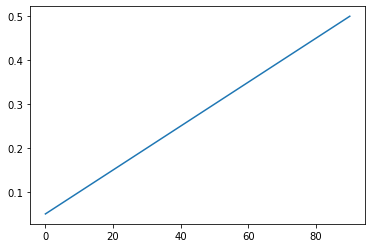

In [59]:
plt.plot(t, omega)

matches with test! [ True  True  True ...  True  True  True]


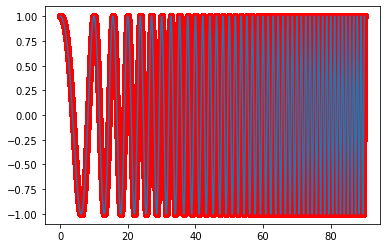

In [62]:
plt.plot(t,y)
plt.scatter(t, ytest, c = 'r')

print("matches with test!", np.equal(y, ytest))

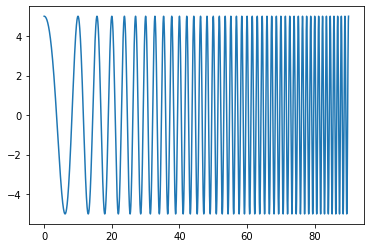

dy[0] : -4.306512091378778e-11, dy[-1] : 4.663848636454748e-08
5.1945163924082755e-05


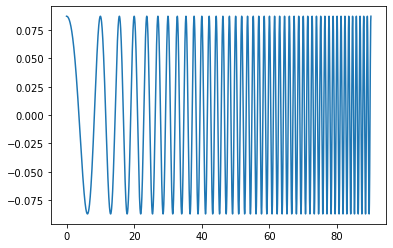

In [63]:
Amp = 5
ydegree = y*Amp
# dy = np.gradient(ydegree)

# print("dy[0] : {}, dy[-1] : {}".format(dy[0], dy[-1]))


plt.plot(t, ydegree)
plt.show()

yscaled = ydegree * np.pi / 180 # Make it radian

plt.plot(t, yscaled)
dy = np.gradient(yscaled)

print("dy[0] : {}, dy[-1] : {}".format(dy[0], dy[-1]))

print(np.max(dy))

plt.show()

In [20]:
time_str = []
w_str = []
dw_str = []

for time, omega, domega in zip(t, yscaled, dy):
    time_str.append(format(time, '.7e'))
    w_str.append(format(omega, '.7e'))
    dw_str.append(format(domega, '.7e'))
    
path = "/Users/kunwoosmac/Desktop/Armour R&D/IBPM DNS/Geom File/"
zero = format(0.0, '0.7e')

with open(path + "BoA30_Chirp_L09000.dat", 'w') as file:
    file.write('   ' + str(len(time_str)) + '\n')
    for time, omega, domega in zip(t, yscaled, dy):
        temp_t = format(time, '.7e')
        temp_w = format(omega, '.7e')
        temp_dw = format(domega, '.7e')
        temp_str = "%16s" % temp_t + "%16s" % zero + "%16s" % zero + "%16s" % temp_w +\
        "%16s" % zero + "%16s" % zero + "%16s" % temp_dw + '\n'
        file.write(temp_str)

In [9]:
def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=256, nfft=576)
    fig, ax = plt.subplots()
    ax.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r',
                  shading='gouraud')
    ax.set_title(title)
    ax.set_xlabel('t (sec)')
    ax.set_ylabel('Frequency (Hz)')
    ax.grid(True)
    ax.set_ylim(0.05, 0.5)

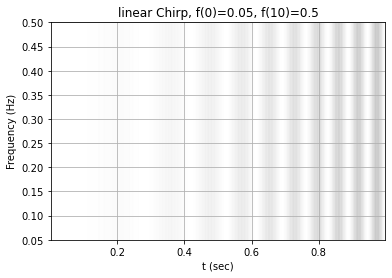

In [10]:
fs = len(t)

plot_spectrogram(f'linear Chirp, f(0)=0.05, f(10)=0.5', y, fs)
plt.show()

In [15]:
Data = [t, np.zeros((len(t), 2)), yscaled, np.zeros((len(t), 2)), dy]

In [1]:
d = {'time' : t, 'x' : np.zeros(len(t)), 'y' : np.zeros(len(t)), 'w' : yscaled,\
     'dx' : np.zeros(len(t)), 'dy' : np.zeros(len(t)), 'dw' : dy}
df = pd.DataFrame(data =d)
df.head(100)

NameError: name 't' is not defined